In [10]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
import pandas as pd

In [21]:
moria_age={
    'age':['0-18 yr','19-49 yr','50-60 yr','60-80 yr'],'n_years':[18,30,10,20],'mid':[9,34,55,70],'total':[0.405,0.548,0.032,0.015]
}

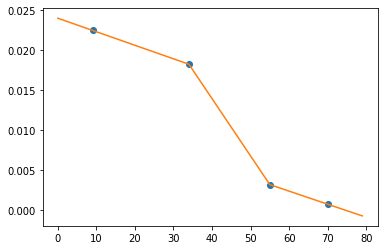

In [27]:
moria_age_frame=pd.DataFrame.from_dict(moria_age)
moria_age_frame['total_per_year']=moria_age_frame['total']/moria_age_frame['n_years']
#save the age csv
moria_age_frame.to_csv('moria_age_distribution.csv')
f = interpolate.interp1d(moria_age_frame['mid'], moria_age_frame['total_per_year'],kind='slinear',fill_value='extrapolate')
xnew = np.arange(0, 80, 1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(moria_age_frame['mid'], moria_age_frame['total_per_year'], 'o', xnew, ynew, '-')
plt.show()

In [28]:
ynew[ynew<0]=0
age_fit={
    'age':xnew,'prop':ynew
}
moria_age_fit=pd.DataFrame.from_dict(age_fit)
moria_age_fit['age10']=np.floor(moria_age_fit['age']/10)*10
age10_prop=moria_age_fit.groupby('age10').sum()['prop']
age10_prop=age10_prop/age10_prop.sum()

In [42]:
moria_age10_prop=age10_prop.values*100

In [43]:
moria_age10_prop

array([23.55120884, 21.83682285, 20.12243686, 17.57563836, 10.86677736,
        4.16399095,  1.66882652,  0.21429825])

In [ ]:
#output to template

In [44]:
import os
cwd = os.getcwd()
template=pd.read_csv(os.path.join(cwd,'camp_params_template.csv'))

In [45]:
moria_age10=np.append(moria_age10_prop,[0,20000])
assert template.shape[0]==len(moria_age10)

In [47]:
template['Moria']=moria_age10

In [49]:
template.to_csv('moria_params')